# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

### Ejercicio

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

### Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

### Definir el objetivo.
- ¿Qué quieres conseguir y por qué?
Quiero identificar a los operadores que tienen métricas relacionadas con un bajo de rendimiento (como altos niveles de llamadas perdidas internas como externas y un tiempo de espera prolongado para las llamadas entrantes, además de un numero reducido de llamadas salientes). Para darle a CallMeMaybe una mejor asignación de llamadas y tomar decisiones para la capacitación o ajuste en el desempeño de los operadores.

- ¿A quién le interesa lo que produces?
Al servicio de telefonía virtual CallMeMaybe.

- ¿Qué decisiones se tomarán de acuerdo a tu análisis?
Asignar capacitación espeficica para los operadores con métricas que se relacionen con la ineficacia.
Mejorar los procesos internos de la empresa, con la finalidad de reducir el numero de llamadas perdidas.
Implementar nuevas estrategias con la finalidad de optimizar las llamadas entrantes y salientes.

### Proponer hipótesis.
#### - Hipótesis: Los operadores ineficientes tienen un mayor porcentaje de llamadas perdidas y tiempos de espera mas altos en comparacion con los operadores eficientes, lo que puede indicar una relación directa entre la eficiencia operativa y la cantidad de llamadas atendidas correctamente y en menor tiempo.

#### - La hipotesis alternativa (H1) es: Los operadores ineficientes tienen un mayor porcentaje de llamadas perdidas y tiempos de espera más altos en comparación con los operadores eficientes, lo que implicaría una relación directa entre la eficiencia operativa y las métricas de rendimiento.
#### - La hipotesis nula (H0) es: No hay una relación directa entre la eficiencia operativa y la cantidad de llamadas atendidas correctamente y en menor tiempo.

## Preprocesamiento.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st

## Analisis exploratorio de datos.
- Utilizar el .info().

Para el caso de telecom_dataset.

In [2]:
telecom_dataset = pd.read_csv(r'C:\Users\tonyh\Desktop\PF_DA_25\telecom_dataset_us.csv')
print(telecom_dataset.head())
print(telecom_dataset.info())

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Coun

Para el caso de telecom_clients.

In [3]:
telecom_clients = pd.read_csv(r'C:\Users\tonyh\Desktop\PF_DA_25\telecom_clients_us.csv')
print(telecom_clients.head())
print(telecom_clients.info())

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


### Estudiar valores ausentes.

Para el caso de telecom_dataset.

In [4]:
print(telecom_dataset.info())
print(telecom_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


Como podemos ver en el resultado anterior, si hay valores ausentes. 

Hay 117 para la columna "internal" en donde se almacena informacion acerca de si fue una llamada interna o externa y tambien hay 8172 valores ausentes en la columna "operaotr_id" en donde se almacena el numero de identificacion del operador.

A continuacion rellenaremos los valores ausentes en la columna de "internal" con un "unknown" y eliminaremos todos los datos en donde haya valores ausentes dentro de la columna "operador_id".

In [5]:
#Rellenamos los valores ausentes en la columna "internal" con "unknown"
telecom_dataset['internal'] = telecom_dataset['internal'].fillna('unknown')
print(telecom_dataset.isna().sum())

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [6]:
# Eliminamos las filas que tienen valores ausentes en la columna "operator_id"
telecom_dataset = telecom_dataset.dropna(subset=['operator_id'])
print(telecom_dataset.isna().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


Para el caso de telecom_clients.

In [7]:
print(telecom_clients.info())
print(telecom_clients.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
user_id        0
tariff_plan    0
date_start     0
dtype: int64


En este caso podemos observar que no hay valores ausentes, por lo que no hay necesidad de rellenarlos o bien de hacer algo.

### Estudiar el tipo de correspondencia

Para el caso de telecom_dataset.

In [8]:
print(telecom_dataset.dtypes)

user_id                  int64
date                    object
direction               object
internal                object
operator_id            float64
is_missed_call            bool
calls_count              int64
call_duration            int64
total_call_duration      int64
dtype: object


En este caso podemos darnos cuenta de que hay columnas que no tienen el tipo de valor correcto, como es el caso de "date" al tener el tipo de datos "object" y deberia de tener el tipo de datos "datetime", y en el caso de la variable "internal", esta en tipo de datos "object" y deberia de tener el tipo de datos "category".

In [9]:
# Convertimos las columnas al tipo de datos correcto.
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'])
telecom_dataset['internal'] = telecom_dataset['internal'].astype('category')

# Verificamos los cambios.
print(telecom_dataset.dtypes)

user_id                                    int64
date                   datetime64[ns, UTC+03:00]
direction                                 object
internal                                category
operator_id                              float64
is_missed_call                              bool
calls_count                                int64
call_duration                              int64
total_call_duration                        int64
dtype: object


Para el caso de telecom_clients.

In [10]:
print(telecom_clients.dtypes)

user_id         int64
tariff_plan    object
date_start     object
dtype: object


En este caso podemos darnos cuenta de que hay columnas que no tienen el tipo de valor correcto, como es el caso de "date_start" al tener el tipo de datos "object" y deberia de tener el tipo de datos "datetime", y en el caso de la columna "tariff_plan" que esta en tipo de datos "object" y deberia de tener el tipo de datos "category".

In [11]:
# Convertimos las columnas a categóricas
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])
telecom_clients['tariff_plan'] = telecom_clients['tariff_plan'].astype('category')

# Verificamos los cambios.

print(telecom_clients.dtypes)

user_id                 int64
tariff_plan          category
date_start     datetime64[ns]
dtype: object


### Estudiar valores duplicados

Para el caso de telecom_dataset.

In [12]:
# Contamos valores duplicados por columna
duplicados_por_columna = telecom_dataset.apply(lambda col: col.duplicated().sum())
print(duplicados_por_columna)

user_id                45440
date                   45612
direction              45728
internal               45727
operator_id            44638
is_missed_call         45728
calls_count            45273
call_duration          40391
total_call_duration    39744
dtype: int64


En este caso a pesar de ver que hay muchos duplicados en todas las columnas, podemos decir que son duplicados relacionados con eventos diferentes, es decir, por ejemplo, en el caso de los duplicados de la columna "user_id" podemos decir que sus duplicados estan relacionados con usuarios que hicieron muchas llamadas en un dia diferente, con un operador diferente o bien con una duracion diferente, lo que puede hacer que a pesar de que sea el mismo "user_id" el cual esta registrado, estos registros pertenecen a eventos diferentes.

Para el caso de telecom_clients.

In [13]:
# Contamos valores duplicados por columna
duplicados_por_columna_clients = telecom_clients.apply(lambda col: col.duplicated().sum())
print(duplicados_por_columna_clients)

user_id          0
tariff_plan    729
date_start     659
dtype: int64


En este caso podemos ver que si hay valores duplicados, en las columnas "tariff_plan" y "date_start", pero no hay ningun duplicado en la columna "user_id", lo que puede significar que los duplicados se dan por usuarios que contrataron el mismo plan de tarifa en la misma fecha, pero esto no significa que sean los mismos eventos, ya que son eventos aislados para cada usuario.

### Comprobar la exactitud de los nombres de columnas

Para el caso de telecom_dataset.

In [14]:
print(telecom_dataset.columns)

Index(['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration',
       'total_call_duration'],
      dtype='object')


Para el caso de telecom_clients.

In [15]:
print(telecom_clients.columns)

Index(['user_id', 'tariff_plan', 'date_start'], dtype='object')


### Renombrar las columnas

Para el caso de telecom_dataset.

In [16]:
telecom_dataset.rename(
    columns={ 
        "user_id": "client_id",
        "date": "record_date",
        "direction": "call_direction",  # Asegúrate de que esta columna esté renombrada correctamente
        "internal": "is_internal_call",
        "calls_count": "total_calls",
    }, 
    inplace=True
)
print(telecom_dataset.columns)

Index(['client_id', 'record_date', 'call_direction', 'is_internal_call',
       'operator_id', 'is_missed_call', 'total_calls', 'call_duration',
       'total_call_duration'],
      dtype='object')


Para el caso de telecom_clients.

In [17]:
telecom_clients.rename(
    columns={
        "user_id": "client_id"
    },
    inplace=True
)
print(telecom_clients.columns)

Index(['client_id', 'tariff_plan', 'date_start'], dtype='object')


# Identificar operadores ineficaces

In [18]:
# Calculamos el tiempo de espera de las llamadas
telecom_dataset['wait_duration'] = telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']

# Realizamos la agregación para calcular las métricas de ineficiencia
inefficiency_metrics = telecom_dataset.groupby('operator_id').agg({
    'is_missed_call': lambda x: (x & (telecom_dataset.loc[x.index, 'call_direction'] == 'in')).mean(),  # % de llamadas perdidas entrantes
    'call_duration': 'mean',  # Duración promedio de llamadas
    'wait_duration': 'mean',  # Tiempo de espera promedio
    'call_direction': lambda x: (telecom_dataset.loc[x.index, 'call_direction'] == 'out').mean()  # % de llamadas salientes
}).reset_index()

# Calculamos la media y la desviación estándar para el tiempo de espera
mean_wait = telecom_dataset['wait_duration'].mean()
std_wait = telecom_dataset['wait_duration'].std()

# Establecemos el umbral dinámico para el tiempo de espera
threshold_wait = mean_wait + std_wait

# Calculamos el percentil 0.75 para el porcentaje de llamadas salientes
percentile_75_outgoing_calls = inefficiency_metrics['call_direction'].quantile(0.75)

# Aplicamos los umbrales dinámicos para marcar a los operadores ineficaces
inefficiency_metrics['is_inefficient'] = (
    (inefficiency_metrics['is_missed_call'] > 0.75) |  # % de llamadas perdidas entrantes alto
    (inefficiency_metrics['wait_duration'] > threshold_wait) |  # Tiempo de espera alto
    (inefficiency_metrics['call_direction'] < percentile_75_outgoing_calls)  # % de llamadas salientes bajo
)

# Mostramos los resultados
print(f"Umbral dinámico de tiempo de espera: {threshold_wait}")
print(f"Umbral dinámico de llamadas salientes (percentil 0.75): {percentile_75_outgoing_calls}")
print(inefficiency_metrics.head())  
print(inefficiency_metrics['is_inefficient'].value_counts())

Umbral dinámico de tiempo de espera: 1486.5622605943581
Umbral dinámico de llamadas salientes (percentil 0.75): 1.0
   operator_id  is_missed_call  call_duration  wait_duration  call_direction  \
0     879896.0             0.0     650.476562     110.671875        0.820312   
1     879898.0             0.0    1111.067729     450.087649        0.745020   
2     880020.0             0.0     104.090909      15.181818        0.636364   
3     880022.0             0.0     240.842105      57.565789        0.894737   
4     880026.0             0.0     856.939394     121.171717        0.904040   

   is_inefficient  
0            True  
1            True  
2            True  
3            True  
4            True  
is_inefficient
True     780
False    312
Name: count, dtype: int64


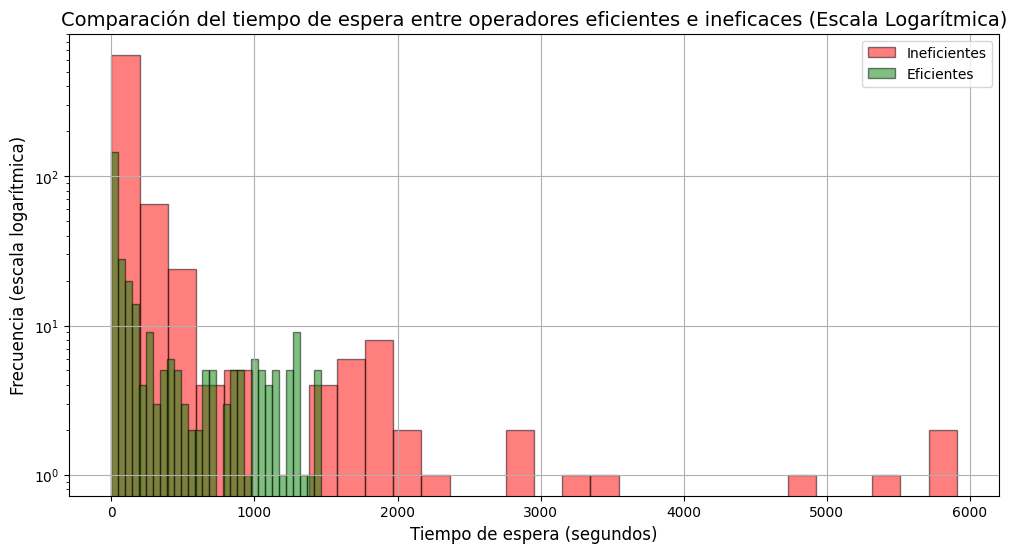

In [19]:
# Definimos los operadores ineficaces (que tienen el valor 'True' en 'is_inefficient')
inefficient_operators = inefficiency_metrics[inefficiency_metrics['is_inefficient'] == True]
efficient_operators = inefficiency_metrics[inefficiency_metrics['is_inefficient'] == False]

# Creamos un histograma de comparación entre ineficientes y eficientes en función del tiempo de espera (wait_duration)
plt.figure(figsize=(12,6))

# Histograma para operadores ineficaces (ajustado con logaritmo)
plt.hist(inefficient_operators['wait_duration'], bins=30, alpha=0.5, label='Ineficientes', color='red', edgecolor='black', log=True)

# Histograma para operadores eficaces (ajustado con logaritmo)
plt.hist(efficient_operators['wait_duration'], bins=30, alpha=0.5, label='Eficientes', color='green', edgecolor='black', log=True)

# Agregamos etiquetas y título
plt.title('Comparación del tiempo de espera entre operadores eficientes e ineficaces (Escala Logarítmica)', fontsize=14)
plt.xlabel('Tiempo de espera (segundos)', fontsize=12)
plt.ylabel('Frecuencia (escala logarítmica)', fontsize=12)

# Mostramos leyenda y el gráfico
plt.legend()
plt.grid(True)
plt.show()

El histograma muestra la distribución del tiempo de espera de los operadores eficientes e ineficientes. Al analizar la distribución en escala logarítmica, se puede observar que: Los operadores ineficaces se relacionan fuertemente con los tiempos de espera más altos, lo que indica que estos operadores tienen más demoras en general en comparación con los operadores eficientes.
Por otro lado, tambien podemos observar como es que los operadores eficientes tienen una distribución más homogénea, con tiempos de espera más bajos, lo que sugiere que su desempeño en la gestión de llamadas es más rápido y efectivo.

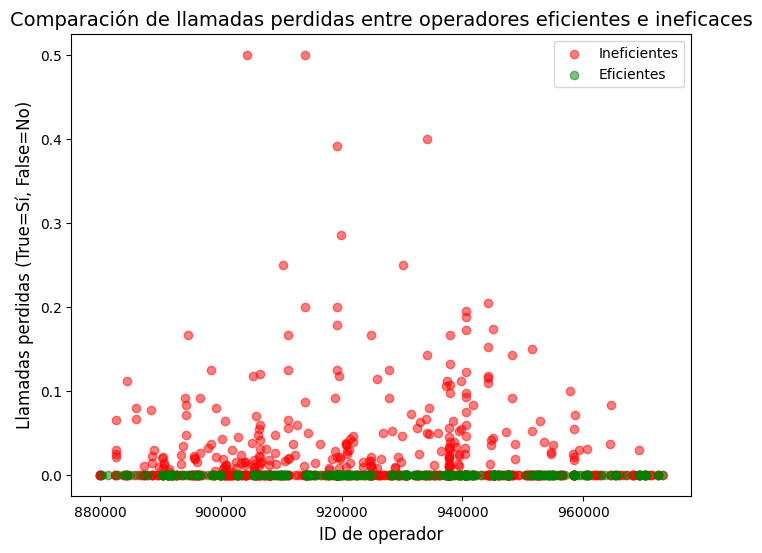

In [20]:
# Creamos el gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))

# Graficamos los operadores ineficaces (en rojo)
plt.scatter(inefficient_operators['operator_id'], inefficient_operators['is_missed_call'], 
            color='red', label='Ineficientes', alpha=0.5)

# Graficamos los operadores eficientes (en verde)
plt.scatter(efficient_operators['operator_id'], efficient_operators['is_missed_call'], 
            color='green', label='Eficientes', alpha=0.5)

# Agregamos etiquetas y título
plt.title('Comparación de llamadas perdidas entre operadores eficientes e ineficaces', fontsize=14)
plt.xlabel('ID de operador', fontsize=12)
plt.ylabel('Llamadas perdidas (True=Sí, False=No)', fontsize=12)

# Agregamos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

En conclusion, una vez visto el diagrama de dispersion sobre el historial de llamadas perdidas con relacion a los operadores eficientes e ineficientes, se puede observar que: Los operadores ineficaces se relacionan fuertemente con una mayor cantidad de llamadas perdidas lo que indica que estos operadores tienen una mayor falta de responsabilidad a la hora de atender las llamadas en comparación con los operadores eficientes. Ya que, como tambien podemos observar la cantidad de llamadas perdidas relacionada con los operadores eficientes es cercana a 0, lo que es una consecuencia directa de una atencion mas responsable a la hora de atender las llamadas.

C:\Users\tonyh\AppData\Local\Temp\ipykernel_18604\1412175325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inefficient_operators['outgoing_call_percentage'] = inefficient_operators['call_direction']
C:\Users\tonyh\AppData\Local\Temp\ipykernel_18604\1412175325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficient_operators['outgoing_call_percentage'] = efficient_operators['call_direction']


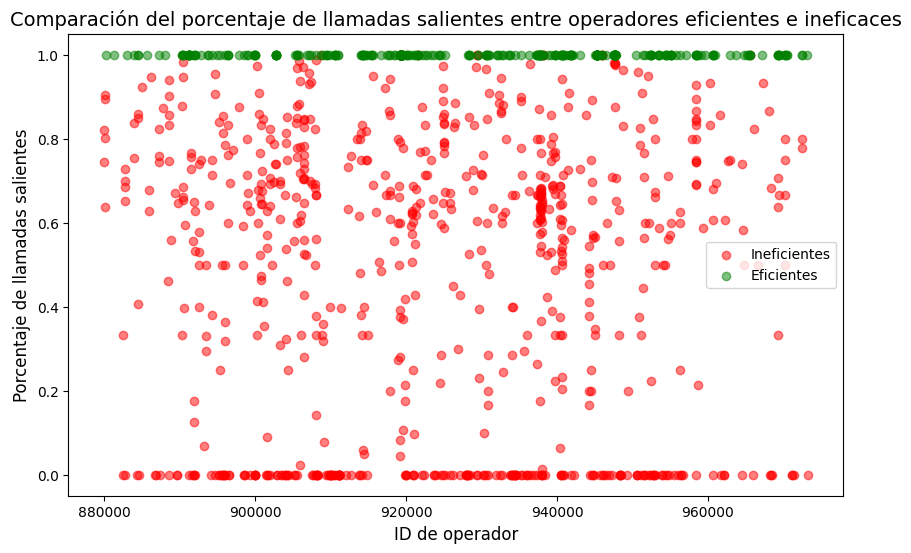

In [21]:
# Calculamos el porcentaje de llamadas salientes
inefficient_operators['outgoing_call_percentage'] = inefficient_operators['call_direction']
efficient_operators['outgoing_call_percentage'] = efficient_operators['call_direction']

# Ahora, graficamos el porcentaje de llamadas salientes
plt.figure(figsize=(10, 6))

# Scatter plot para operadores ineficientes y eficientes con el porcentaje de llamadas salientes
plt.scatter(inefficient_operators['operator_id'], inefficient_operators['outgoing_call_percentage'], 
            color='red', alpha=0.5, label='Ineficientes')
plt.scatter(efficient_operators['operator_id'], efficient_operators['outgoing_call_percentage'], 
            color='green', alpha=0.5, label='Eficientes')

# Títulos y etiquetas
plt.title('Comparación del porcentaje de llamadas salientes entre operadores eficientes e ineficaces', fontsize=14)
plt.xlabel('ID de operador', fontsize=12)
plt.ylabel('Porcentaje de llamadas salientes', fontsize=12)

# Leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

Una vez observado el gráfico podemos darnos cuenta como es que los operadores eficientes tienen un porcentaje alto de llamadas salientes, lo que refleja un desempeño más proactivo y efectivo en la gestión de llamadas. Sin embargo, en el caso contrario, podemos encontrar los operadores ineficientes, los cuales  presentan un porcentaje bajo y algunas veces rozando el cero de llamadas salientes, indicando una falta de proactividad y eficiencia en su labor.


# Prueba las hipótesis estadísticas

In [22]:
u_stat, p_value = stats.mannwhitneyu(
    efficient_operators['is_missed_call'], 
    inefficient_operators['is_missed_call']
)

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretamos el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Los operadores ineficientes tienen un mayor porcentaje de llamadas perdidas y tiempos de espera más altos en comparación con los operadores eficientes, lo que implicaría una relación directa entre la eficiencia operativa y las métricas de rendimiento.")
else:
    print("No rechazamos la hipótesis nula.No hay una relación directa entre la eficiencia operativa y la cantidad de llamadas atendidas correctamente y en menor tiempo.")

U-statistic: 84396.0, P-value: 6.921717952037933e-28
Rechazamos la hipótesis nula. Los operadores ineficientes tienen un mayor porcentaje de llamadas perdidas y tiempos de espera más altos en comparación con los operadores eficientes, lo que implicaría una relación directa entre la eficiencia operativa y las métricas de rendimiento.



## Conclusiones y recomendaciones:

Conclusiones:

En conclusión, podemos afirmar que los operadores ineficientes presentan un mayor número de llamadas perdidas en comparación con los operadores eficientes. Además, en relación al tiempo de espera, observamos que los operadores eficientes tienen tiempos de espera más bajos, lo que refleja una mejor eficiencia en la gestión de llamadas. Por último, en el análisis del porcentaje de llamadas salientes, podemos concluir que los operadores eficientes tienen un alto porcentaje de llamadas salientes, lo que indica un desempeño más productivo. En cambio, los operadores ineficientes tienen un porcentaje muy bajo de llamadas salientes, lo que demuestra una falta de disposición para gestionar más interacciones.

La prueba de hipótesis, utilizando la prueba estadística de Mann-Whitney U, nos permitió rechazar la hipótesis nula. Esto evidencia que existe una diferencia significativa entre los operadores eficientes e ineficientes, particularmente en lo relacionado con las llamadas perdidas y los tiempos de espera.


Recomendaciones:

A partir de los hallazgos anteriores, se pueden proponer las siguientes recomendaciones:

Implementar programas de capacitación continua para los operadores ineficientes, enfocados en mejorar su productividad y habilidades para gestionar las llamadas de manera más eficiente.

Establecer un sistema de métricas de desempeño más detallado, que no solo considere las llamadas atendidas y los tiempos de espera, sino también el porcentaje de llamadas salientes y la calidad en la atención. Esto permitirá identificar mejor a los operadores más eficientes e ineficientes y dirigir estrategias de mejora más efectivas.

Revisar los procesos internos relacionados con la gestión de llamadas, asegurando que los operadores cuenten con las herramientas necesarias para atender las llamadas de manera oportuna y efectiva.

Fomentar una cultura de retroalimentación constante para los operadores, informándoles sobre el impacto de su desempeño en el servicio. Además, implementar un sistema de incentivos puede ser efectivo para premiar a los operadores más eficientes y motivar una mejora continua.